In [243]:
import requests
from bs4 import BeautifulSoup
import config #db connection
import functions
import mysql.connector
from mysql.connector import errorcode
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline

# Data Aggregation

In [2]:
artists = ['NAV', 'Future' ,'Lil Uzi Vert', 'Meek Mill', 'J. Cole', 'Chief Keef', \
           'Young Thug', 'Travis Scott', '21 Savage', 'Gunna' ,'Lil Baby',\
           'Famous Dex', 'The Weeknd' ,'Juice WRLD', 'Offset', 'Migos', 'Trippie Redd']

In [50]:
df_lists = []
for artist in artists:
    df_lists.append(functions.productionize(artist))
# productionize('Travis Scott')

Page 2 finished scraping
Page 3 finished scraping
Page 4 finished scraping
Page 5 finished scraping
Page 6 finished scraping
Page 7 finished scraping
Page 8 finished scraping
Page 9 finished scraping
Page 10 finished scraping
Page 11 finished scraping
Page 12 finished scraping
Collected lyrics for all songs
Colleted all lyrics for NAV
Page 2 finished scraping
Page 3 finished scraping
Page 4 finished scraping
Page 5 finished scraping
Page 6 finished scraping
Page 7 finished scraping
Page 8 finished scraping
Page 9 finished scraping
Page 10 finished scraping
Page 11 finished scraping
Page 12 finished scraping
Page 13 finished scraping
Page 14 finished scraping
Page 15 finished scraping
Page 16 finished scraping
Page 17 finished scraping
Page 18 finished scraping
Page 19 finished scraping
Page 20 finished scraping
Page 21 finished scraping
Page 22 finished scraping
Page 23 finished scraping
Page 24 finished scraping
Page 25 finished scraping
Page 26 finished scraping
Page 27 finished scra

Page 5 finished scraping
Page 6 finished scraping
Page 7 finished scraping
Page 8 finished scraping
Page 9 finished scraping
Page 10 finished scraping
Page 11 finished scraping
Page 12 finished scraping
Page 13 finished scraping
Page 14 finished scraping
Page 15 finished scraping
Page 16 finished scraping
Page 17 finished scraping
Page 18 finished scraping
Page 19 finished scraping
Page 20 finished scraping
Page 21 finished scraping
Page 22 finished scraping
Page 23 finished scraping
Page 24 finished scraping
Page 25 finished scraping
Page 26 finished scraping
Page 27 finished scraping
Collected lyrics for all songs
Colleted all lyrics for Famous Dex
Page 2 finished scraping
Page 3 finished scraping
Page 4 finished scraping
Page 5 finished scraping
Page 6 finished scraping
Page 7 finished scraping
Page 8 finished scraping
Page 9 finished scraping
Page 10 finished scraping
Page 11 finished scraping
Page 12 finished scraping
Page 13 finished scraping
Page 14 finished scraping
Page 15 fin

In [66]:
major_df = pd.concat(df_lists, axis=0) #join all dataframes in dataframe list
major_df.reset_index(drop=True, inplace=True) #reset index to combined dataframe

In [73]:
lyrics_tuples = [tuple(x) for x in major_df.to_records(index=False)]

# Connecting to DB

In [74]:
cnx = mysql.connector.connect(
      host = config.my_cred['host'],
      user = config.my_cred['user'],
      passwd = config.my_cred['pw'],
      database= 'genius_lyrics'
)
cursor = cnx.cursor()

## Create DB

In [18]:
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)
create_database(cursor, 'genius_lyrics')

## Create Table

In [38]:
#CREATE TABLE
cursor.execute("""USE genius_lyrics""")
TABLES = {}
TABLES['lyrics'] = (
    "CREATE TABLE lyrics ("
    "  id INT NOT NULL AUTO_INCREMENT,"
    "  artist varchar(255),"
    "  titles varchar(255),"
    "  lyric TEXT NOT NULL,"
    "  PRIMARY KEY (id)"
    ") ENGINE=InnoDB")

In [39]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

cursor.close()
cnx.close()

Creating table lyrics: OK


## Insert Data Into Table

In [37]:
def db_insert_lyrics(cnx, cursor, lyrics):
    stmt = ("INSERT INTO lyrics (artist, titles, lyric) VALUES (%s,%s, %s)")
    cursor.executemany(stmt, lyrics)
    cnx.commit()
    
db_insert_lyrics(cnx, cursor, lyrics_tuples)
cnx.close()

# Data Preprocessing

In [167]:
major_df['cleaned_lyrics'] = major_df['lyrics'].str.replace("[\[].*?[\]]", "", regex=True)

In [168]:
major_df['cleaned_lyrics'] = major_df['cleaned_lyrics'].str.replace("\\n", ' ', regex = True)

In [262]:
#tokenize lyrics for all songs
major_df['tokenized_stop_lyrics'] = major_df.cleaned_lyrics.apply(lambda x: functions.clean_tokenize_lyrics(x))

Save dataframe to csv/read df

In [268]:
# major_df.to_csv('df.csv')
# major_df = pd.read_csv('df.csv')

# EDA

In [264]:
chief_keef = major_df[major_df['artist'] == 'Chief Keef'].tokenized_stop_lyrics.to_list()
juice_wrld = major_df[major_df['artist'] == 'Juice WRLD'].tokenized_stop_lyrics.to_list()
meek_mill = major_df[major_df['artist'] == 'Meek Mill'].tokenized_stop_lyrics.to_list()
future = major_df[major_df['artist'] == 'Future'].tokenized_stop_lyrics.to_list()
migos = major_df[major_df['artist'] == 'Migos'].tokenized_stop_lyrics.to_list()
lil_uzi = major_df[major_df['artist'] == 'Lil Uzi Vert'].tokenized_stop_lyrics.to_list()
famous_dex = major_df[major_df['artist'] == 'famous_dex'].tokenized_stop_lyrics.to_list()
j_cole = major_df[major_df['artist'] == 'J. Cole'].tokenized_stop_lyrics.to_list()
trippie_redd = major_df[major_df['artist'] == 'Trippie Redd'].tokenized_stop_lyrics.to_list()
the_weeknd = major_df[major_df['artist'] == 'The Weeknd'].tokenized_stop_lyrics.to_list()
savage = major_df[major_df['artist'] == '21 Savage'].tokenized_stop_lyrics.to_list()
nav = major_df[major_df['artist'] == 'NAV'].tokenized_stop_lyrics.to_list()
gunna = major_df[major_df['artist'] == 'Gunna'].tokenized_stop_lyrics.to_list()
offset = major_df[major_df['artist'] == 'Offset'].tokenized_stop_lyrics.to_list()
lil_baby = major_df[major_df['artist'] == 'Lil Baby'].tokenized_stop_lyrics.to_list()

## WordClouds for Lyrics

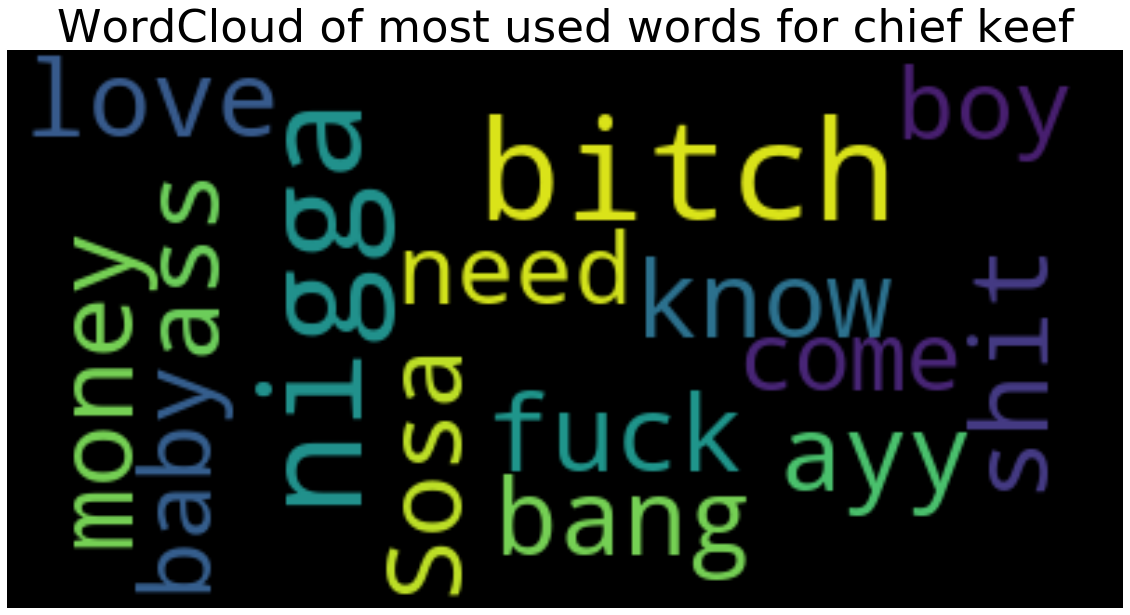

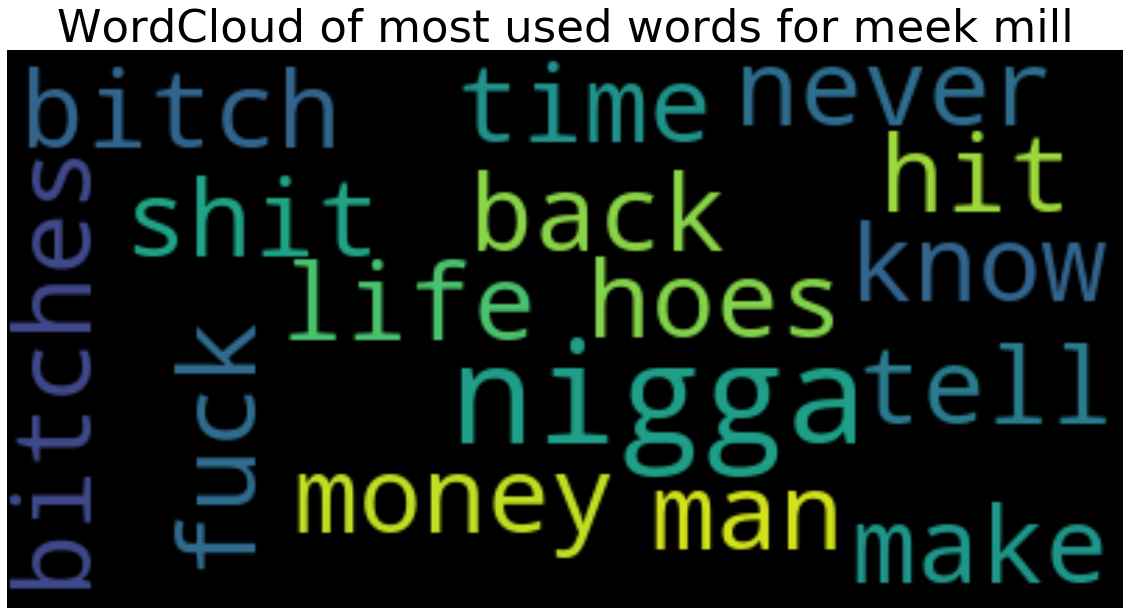

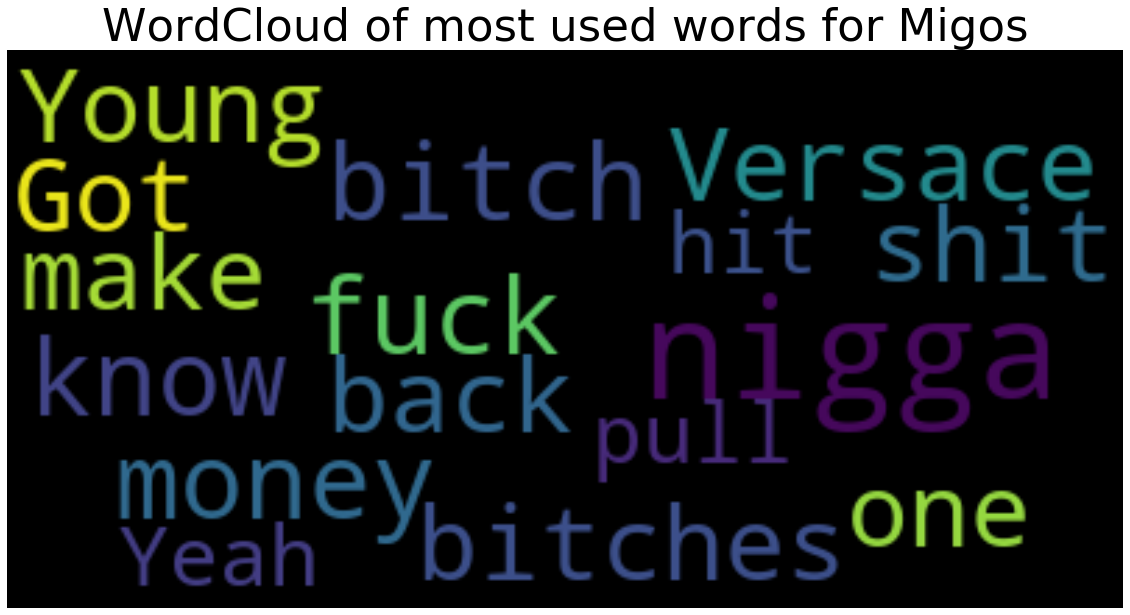

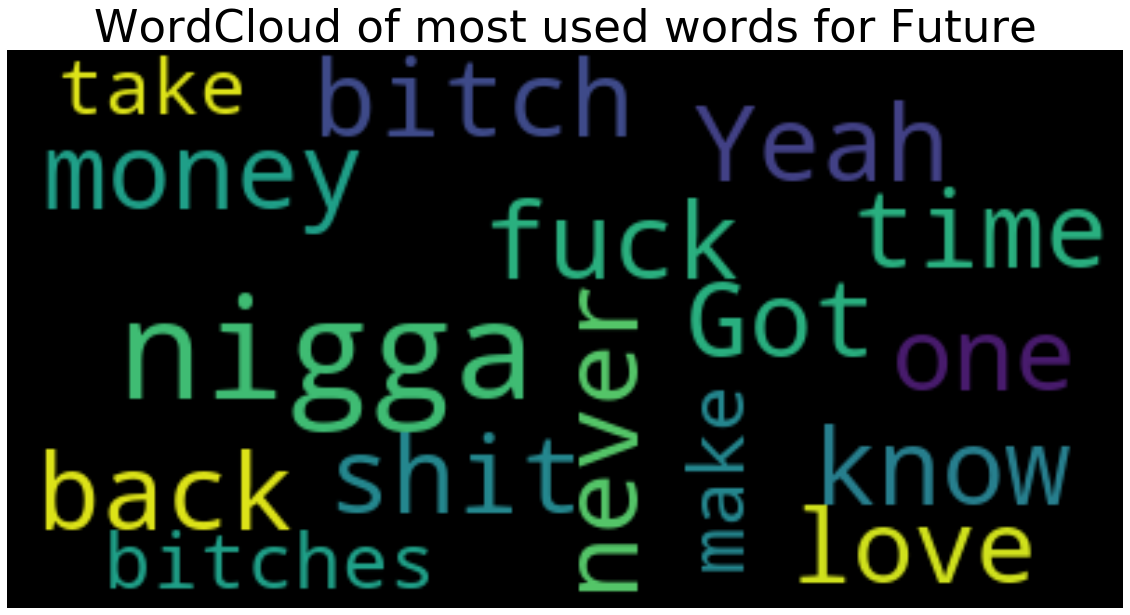

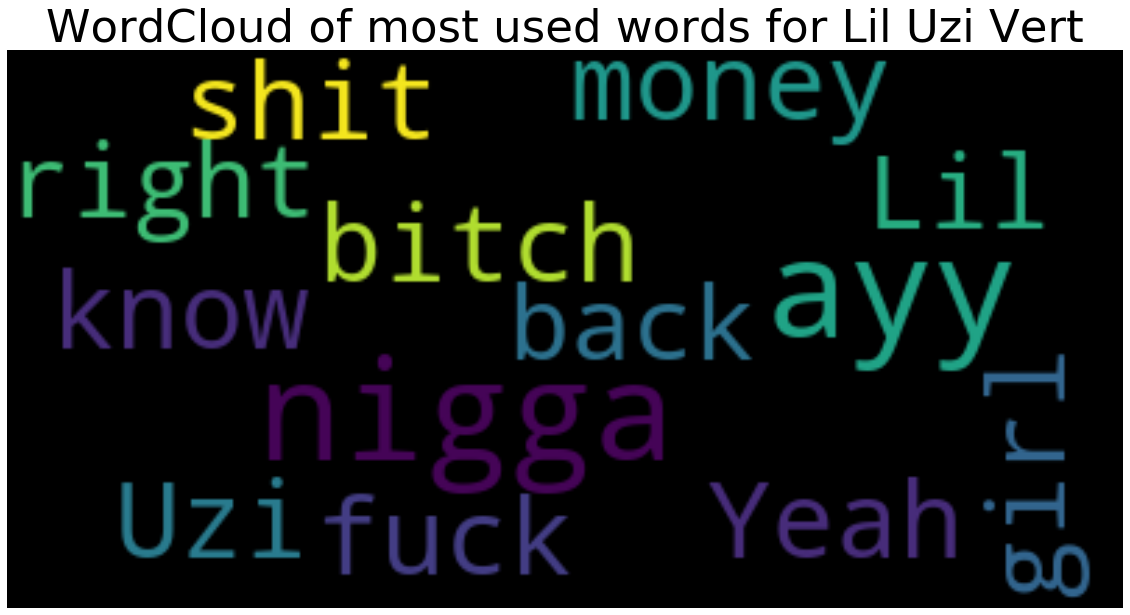

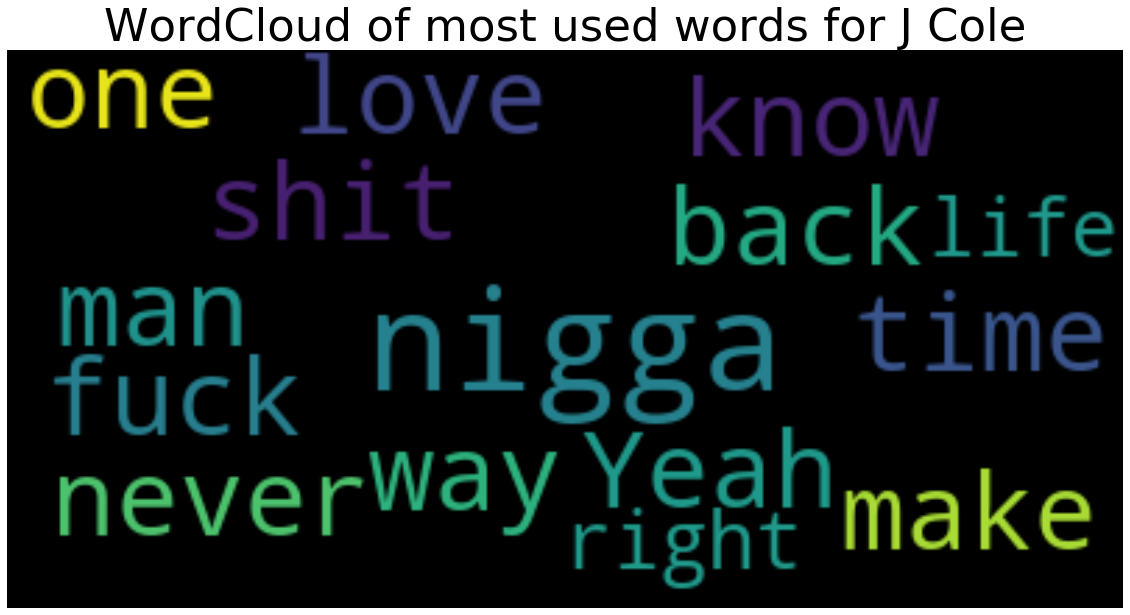

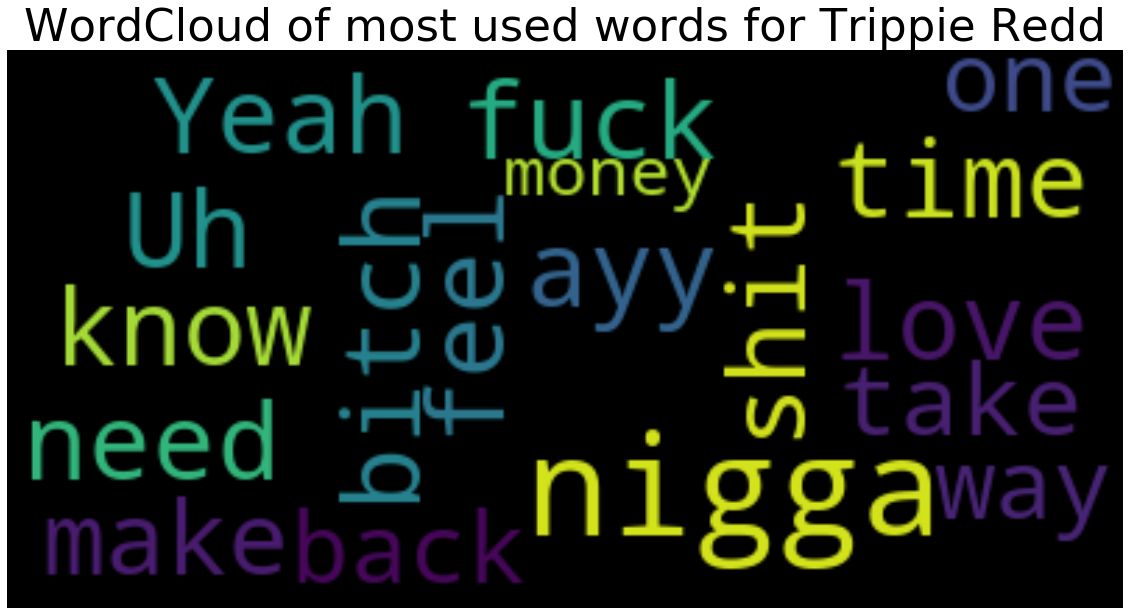

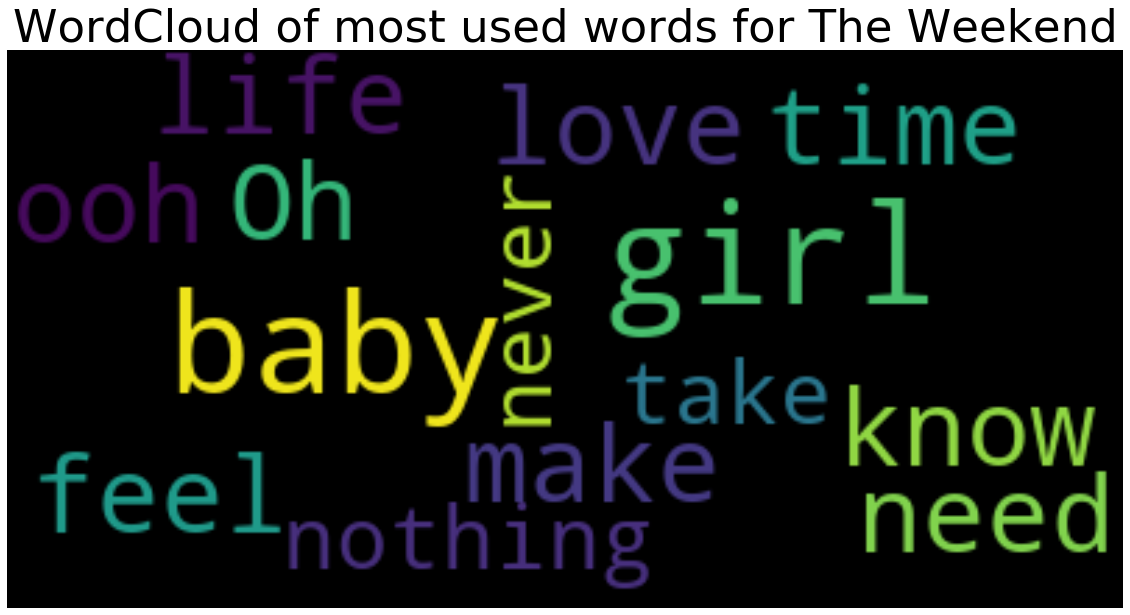

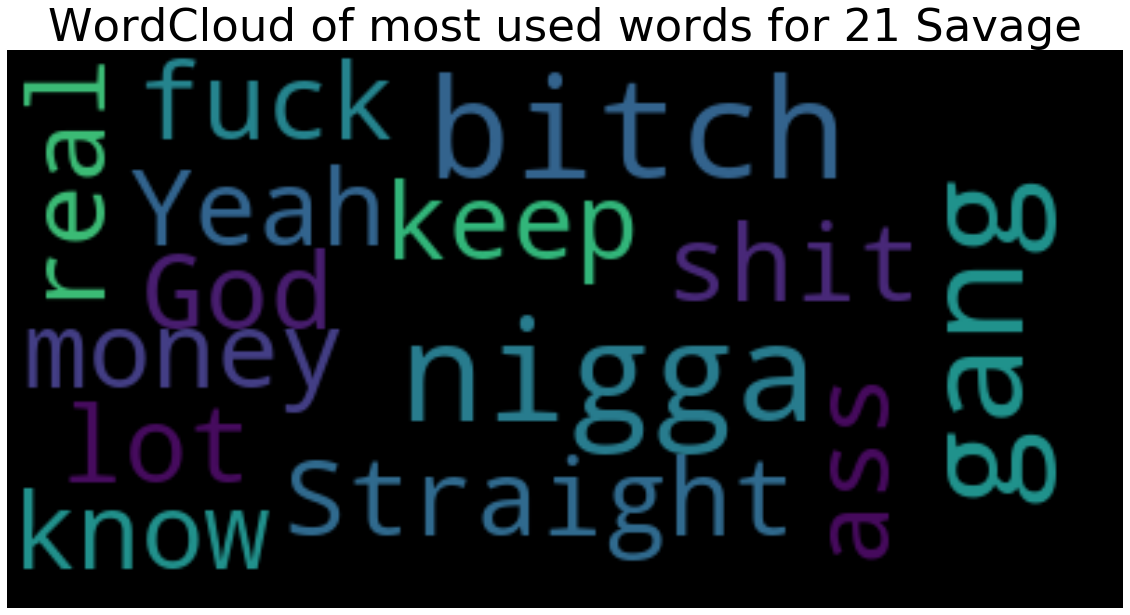

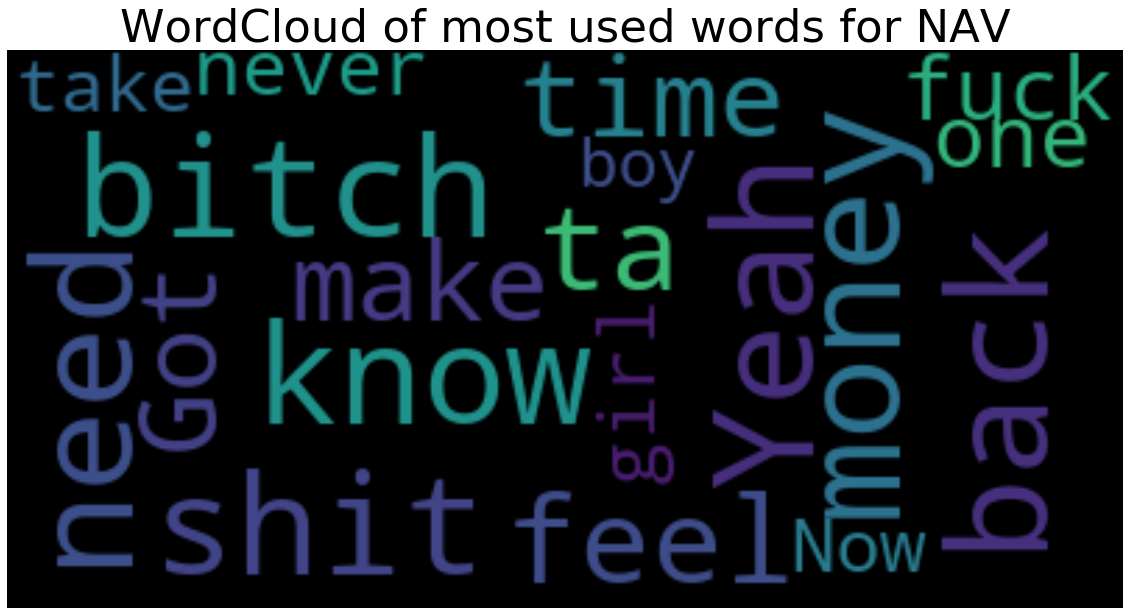

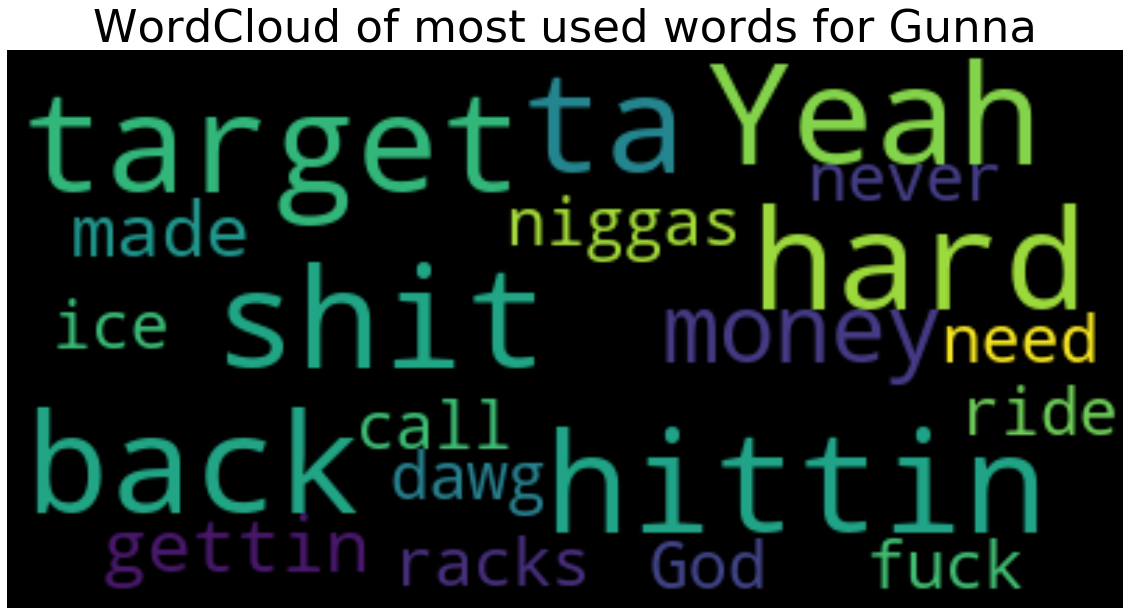

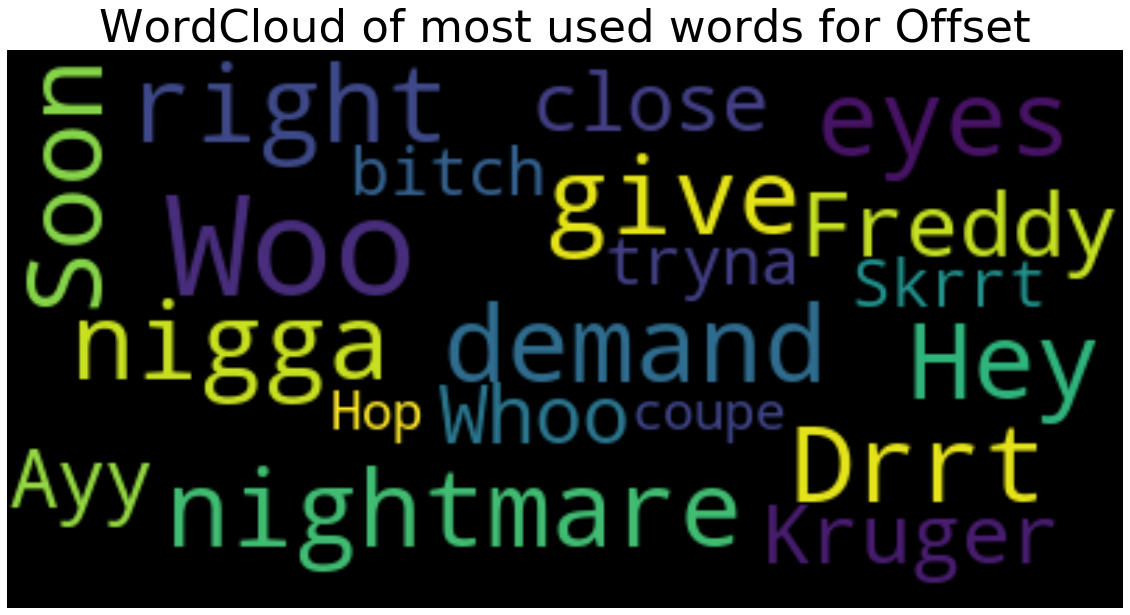

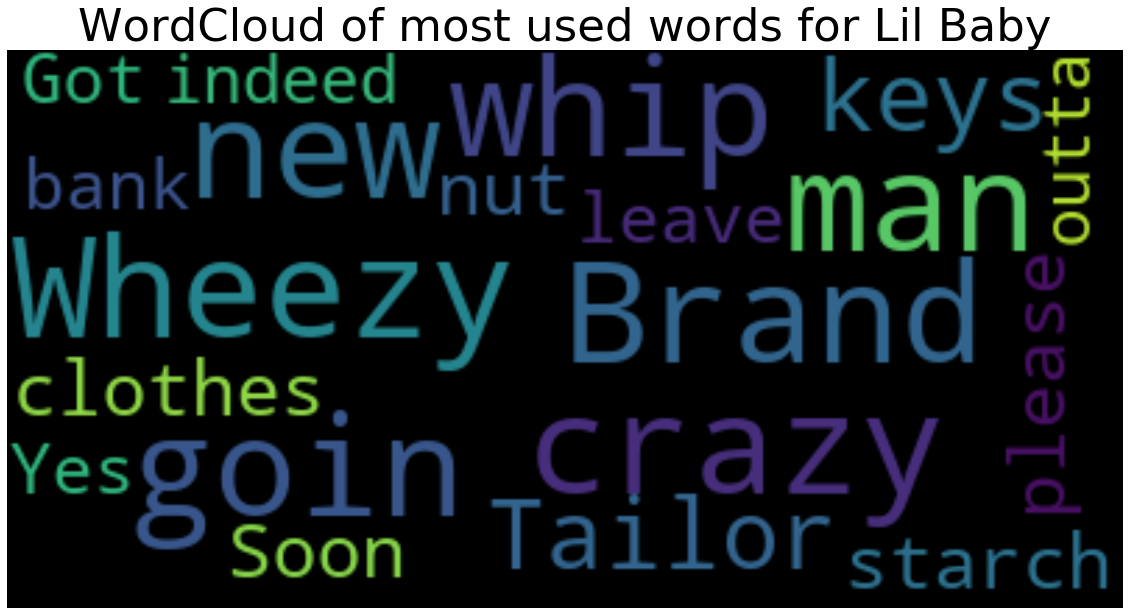

In [267]:
chief_keef_dist = list(itertools.chain.from_iterable(chief_keef))
chief_keef_dist = FreqDist(chief_keef_dist)
chief_keef_words = ' '.join([i[0] for i in chief_keef_dist.most_common(25)])
functions.word_cloud(chief_keef_words, 'chief keef')

meek_mill_dist = list(itertools.chain.from_iterable(meek_mill))
meek_mill_dist = FreqDist(meek_mill_dist)
meek_mill_words = ' '.join([i[0] for i in meek_mill_dist.most_common(25)])
functions.word_cloud(meek_mill_words, 'meek mill')

migos_dist = list(itertools.chain.from_iterable(migos))
migos_dist = FreqDist(migos_dist)
migos_words = ' '.join([i[0] for i in migos_dist.most_common(25)])
functions.word_cloud(migos_words, 'Migos')

future_dist = list(itertools.chain.from_iterable(future))
future_dist = FreqDist(future_dist)
future_dist_words = ' '.join([i[0] for i in future_dist.most_common(25)])
functions.word_cloud(future_dist_words, 'Future')

lil_uzi_dist = list(itertools.chain.from_iterable(lil_uzi))
lil_uzi_dist = FreqDist(lil_uzi_dist)
lil_uzi_words = ' '.join([i[0] for i in lil_uzi_dist.most_common(25)])
functions.word_cloud(lil_uzi_words, 'Lil Uzi Vert')

j_cole_dist = list(itertools.chain.from_iterable(j_cole))
j_cole_dist = FreqDist(j_cole_dist)
j_cole_words = ' '.join([i[0] for i in j_cole_dist.most_common(25)])
functions.word_cloud(j_cole_words, 'J Cole')

trippie_redd_dist = list(itertools.chain.from_iterable(trippie_redd))
trippie_redd_dist = FreqDist(juice_wrld_dist)
trippie_redd_words = ' '.join([i[0] for i in trippie_redd_dist.most_common(25)])
functions.word_cloud(trippie_redd_words, 'Trippie Redd')

the_weekend_dist = list(itertools.chain.from_iterable(the_weeknd))
the_weekend_dist = FreqDist(the_weekend_dist)
the_weeknd_words = ' '.join([i[0] for i in the_weekend_dist.most_common(25)])
functions.word_cloud(the_weeknd_words, 'The Weekend')

savage_dist = list(itertools.chain.from_iterable(savage))
savage_dist = FreqDist(savage_dist)
savage_words = ' '.join([i[0] for i in savage_dist.most_common(25)])
functions.word_cloud(savage_words, '21 Savage')

nav_dist = list(itertools.chain.from_iterable(nav))
nav_dist = FreqDist(nav_dist)
nav_words = ' '.join([i[0] for i in nav_dist.most_common(25)])
functions.word_cloud(nav_words, 'NAV')

gunna_dist = list(itertools.chain.from_iterable(gunna))
gunna_dist = FreqDist(gunna_dist)
gunna_words = ' '.join([i[0] for i in gunna_dist.most_common(25)])
functions.word_cloud(gunna_words, 'Gunna')

offset_dist = list(itertools.chain.from_iterable(offset))
offset_dist = FreqDist(offset_dist)
offset_words = ' '.join([i[0] for i in offset_dist.most_common(25)])
functions.word_cloud(offset_words, 'Offset')

lil_baby_dist = list(itertools.chain.from_iterable(lil_baby))
lil_baby_dist = FreqDist(lil_baby_dist)
lil_baby_words = ' '.join([i[0] for i in lil_baby_dist.most_common(25)])
functions.word_cloud(lil_baby_words, 'Lil Baby')